## Tugas UAS

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('tweet_emotions.csv')
display(df.head())

jml_baris_asli = df.shape[0]
print(f'Jumlah baris: {jml_baris_asli}')

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


Jumlah baris: 40000


#### Preprocessing Data

In [4]:
# Drop twit yang sama
df.drop_duplicates(subset=['content'], inplace=True)

# Cek jumlah data
jml_baris_drop = df.shape[0]
print(f'Jumlah baris: {jml_baris_drop}')
print(f'Jumlah baris duplikasi {jml_baris_asli - jml_baris_drop}')

Jumlah baris: 39827
Jumlah baris duplikasi 173


##### Remove Mention (@) and URL

In [5]:
import re # python regex lib

df = df.copy()

# Membuat kolom baru untuk kebutuhan berbandingan
df['content_clean'] = df['content']

# Membuat fungsi lambda untuk membuat mention, url
rm_rt_url = lambda x: re.sub('(@[A-Za-z0-9\w]+) | (@\w+:) | (\w+:\/\/\S+) | (www.\S+)',' ',x)
rm_punct = lambda x: re.sub('\W', ' ', x)

# Membuat fungsi untuk membuang protocol internet

# Map filter
df['content_clean'] = df.content_clean.map(rm_rt_url).map(rm_punct)
df.head(100)

,tweet_id,sentiment,content,content_clean
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,i know i was listenin to bad habit earlier a...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,Layin n bed with a headache ughhhh waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...,Funeral ceremony gloomy friday
3,1956967789,enthusiasm,wants to hang out with friends SOON!,wants to hang out with friends SOON
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,We want to trade with someone who has Houston...
...,...,...,...,...
95,1956989514,sadness,@sweeetnspicy hiii im on my ipod...i cant fall...,hiii im on my ipod i cant fall asleep
96,1956989526,sadness,dont wanna work 11-830 tomorrow but i get paid,dont wanna work 11 830 tomorrow but i get paid
97,1956989560,sadness,feels sad coz i wasnt able to play with the gu...,feels sad coz i wasnt able to play with the gu...
98,1956989561,neutral,PrinceCharming,PrinceCharming


##### Case Folding

In [6]:
df['content_clean'] = df.content_clean.str.lower()
df.tail(10)

,tweet_id,sentiment,content,content_clean
39990,1753918829,neutral,@shonali I think the lesson of the day is not ...,i think the lesson of the day is not to have ...
39991,1753918846,neutral,@lovelylisaj can you give me the link for the ...,can you give me the link for the kimba diarie...
39992,1753918881,neutral,@jasimmo Ooo showing of your French skills!! l...,ooo showing of your french skills lol thing...
39993,1753918892,neutral,"@sendsome2me haha, yeah. Twitter has many uses...",haha yeah twitter has many uses for me it ...
39994,1753918900,happiness,Succesfully following Tayla!!,succesfully following tayla
39995,1753918954,neutral,@JohnLloydTaylor,johnlloydtaylor
39996,1753919001,love,Happy Mothers Day All my love,happy mothers day all my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...,happy mother s day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,wassup beautiful follow me peep out my ...
39999,1753919049,love,@mopedronin bullet train from tokyo the gf ...,bullet train from tokyo the gf and i have ...


##### Tokenizing

In [7]:
from nltk.tokenize import TweetTokenizer
df_stem = df.copy()

tweet_token = TweetTokenizer()
df_stem['content_token'] = df_stem['content_clean'].apply(tweet_token.tokenize)

df_stem.head()


,tweet_id,sentiment,content,content_clean,content_token
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,i know i was listenin to bad habit earlier a...,"[i, know, i, was, listenin, to, bad, habit, ea..."
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed with a headache ughhhh waitin o...,"[layin, n, bed, with, a, headache, ughhhh, wai..."
2,1956967696,sadness,Funeral ceremony...gloomy friday...,funeral ceremony gloomy friday,"[funeral, ceremony, gloomy, friday]"
3,1956967789,enthusiasm,wants to hang out with friends SOON!,wants to hang out with friends soon,"[wants, to, hang, out, with, friends, soon]"
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,we want to trade with someone who has houston...,"[we, want, to, trade, with, someone, who, has,..."


##### Stemming

In [8]:
# Stemming
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer("english")

def stemming(text):
    stem_text = [stemmer.stem(word) for word in text]
    return stem_text

df_stem['content_stem'] = df_stem['content_token'].apply(lambda x: stemming(x))

df_stem.head()

,tweet_id,sentiment,content,content_clean,content_token,content_stem
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,i know i was listenin to bad habit earlier a...,"[i, know, i, was, listenin, to, bad, habit, ea...","[i, know, i, was, listenin, to, bad, habit, ea..."
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed with a headache ughhhh waitin o...,"[layin, n, bed, with, a, headache, ughhhh, wai...","[layin, n, bed, with, a, headach, ughhhh, wait..."
2,1956967696,sadness,Funeral ceremony...gloomy friday...,funeral ceremony gloomy friday,"[funeral, ceremony, gloomy, friday]","[funer, ceremoni, gloomi, friday]"
3,1956967789,enthusiasm,wants to hang out with friends SOON!,wants to hang out with friends soon,"[wants, to, hang, out, with, friends, soon]","[want, to, hang, out, with, friend, soon]"
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,we want to trade with someone who has houston...,"[we, want, to, trade, with, someone, who, has,...","[we, want, to, trade, with, someon, who, has, ..."


##### Clustering

In [9]:
# Import TextBlog Package

from textblob import TextBlob

# Membuat fungsi untuk menghitung polarity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

df_stem['polarity'] = df_stem['content_clean'].apply(get_polarity)

In [10]:
def condition(c):
    if c>0:
        return "Positif"
    elif c==0:
        return "Neutral"
    else:
        return 'Negatif'

df_stem['sentiment_cluster'] = df_stem['polarity'].apply(condition)

df_stem.head()

,tweet_id,sentiment,content,content_clean,content_token,content_stem,polarity,sentiment_cluster
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,i know i was listenin to bad habit earlier a...,"[i, know, i, was, listenin, to, bad, habit, ea...","[i, know, i, was, listenin, to, bad, habit, ea...",-0.35,Negatif
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed with a headache ughhhh waitin o...,"[layin, n, bed, with, a, headache, ughhhh, wai...","[layin, n, bed, with, a, headach, ughhhh, wait...",0.00,Neutral
2,1956967696,sadness,Funeral ceremony...gloomy friday...,funeral ceremony gloomy friday,"[funeral, ceremony, gloomy, friday]","[funer, ceremoni, gloomi, friday]",0.00,Neutral
3,1956967789,enthusiasm,wants to hang out with friends SOON!,wants to hang out with friends soon,"[wants, to, hang, out, with, friends, soon]","[want, to, hang, out, with, friend, soon]",0.20,Positif
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,we want to trade with someone who has houston...,"[we, want, to, trade, with, someone, who, has,...","[we, want, to, trade, with, someon, who, has, ...",0.00,Neutral


##### Labeling

In [11]:
# Labeling sentiment_cluster and make new column with name labeling from sentiment_cluster
df_stem['labeling'] = df_stem['sentiment_cluster'].map({'Positif': 1, 'Neutral': 0, 'Negatif': -1})
df_stem.head()


,tweet_id,sentiment,content,content_clean,content_token,content_stem,polarity,sentiment_cluster,labeling
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,i know i was listenin to bad habit earlier a...,"[i, know, i, was, listenin, to, bad, habit, ea...","[i, know, i, was, listenin, to, bad, habit, ea...",-0.35,Negatif,-1
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed with a headache ughhhh waitin o...,"[layin, n, bed, with, a, headache, ughhhh, wai...","[layin, n, bed, with, a, headach, ughhhh, wait...",0.00,Neutral,0
2,1956967696,sadness,Funeral ceremony...gloomy friday...,funeral ceremony gloomy friday,"[funeral, ceremony, gloomy, friday]","[funer, ceremoni, gloomi, friday]",0.00,Neutral,0
3,1956967789,enthusiasm,wants to hang out with friends SOON!,wants to hang out with friends soon,"[wants, to, hang, out, with, friends, soon]","[want, to, hang, out, with, friend, soon]",0.20,Positif,1
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,we want to trade with someone who has houston...,"[we, want, to, trade, with, someone, who, has,...","[we, want, to, trade, with, someon, who, has, ...",0.00,Neutral,0


In [12]:
# Cek jumlah data Pastikan Sesuai
print(df_stem['sentiment_cluster'].value_counts())
print(df_stem['labeling'].value_counts())

Positif    18027
Neutral    13619
Negatif     8181
Name: sentiment_cluster, dtype: int64
 1    18027
 0    13619
-1     8181
Name: labeling, dtype: int64


##### Classification

In [13]:
# Buat Clasification with naive bayes
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split data
X_train, X_test, y_train, y_test = train_test_split(df_stem['content_clean'], df_stem['labeling'], test_size=0.2, random_state=42)

# Vectorize
tfidf = TfidfVectorizer()

X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

# Import Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# Train model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
label = {1: 'Positif', 0: 'Neutral', -1: 'Negatif'}
y_test = y_test.map(label)
y_pred = pd.Series(y_pred).map(label)

##### Prediction

In [14]:
# Make Prediction with new data
new_data = ['I love you so much', 'I hate you so much', 'I am so happy', 'I am so sad', 'I am so angry', 'I am so bored']

# new_data = input('Masukkan teks: ')
# new_data = [new_data]

# Vectorize
new_data = tfidf.transform(new_data)

# Predict
new_pred = model.predict(new_data)

# Evaluation
new_pred = pd.Series(new_pred).map(label)
print(new_pred)


0    Positif
1    Negatif
2    Positif
3    Negatif
4    Negatif
5    Negatif
dtype: object


##### Evaluation

In [15]:
# Import library for evaluation
from sklearn.metrics import classification_report,precision_score,recall_score,accuracy_score

print(classification_report(y_test, y_pred))

print(f'Accuracy\t: {accuracy_score(y_test, y_pred)}')
print(f'Precision\t: {precision_score(y_test, y_pred, average="macro")}')
print(f'Recall\t\t: {recall_score(y_test, y_pred, average="macro")}')

              precision    recall  f1-score   support

     Negatif       0.98      0.17      0.29      1623
     Neutral       0.92      0.32      0.48      2752
     Positif       0.53      0.99      0.69      3591

    accuracy                           0.59      7966
   macro avg       0.81      0.49      0.49      7966
weighted avg       0.76      0.59      0.54      7966

Accuracy	: 0.5937735375345217
Precision	: 0.8113139597528978
Recall		: 0.49474918340400365


Confusion Matrix
[[ 272   61 1290]
 [   1  886 1865]
 [   4   15 3572]]


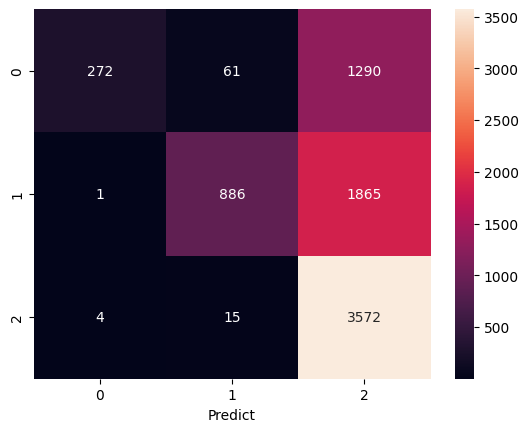

In [16]:
#  Confussion Metric
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print('Confusion Matrix' , confusion_matrix(y_test, y_pred), sep='\n')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predict')
plt.show()